# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Bitcoin Prediction

The extremely nonlinear nature of the crypto market data makes it very difficult to design a system that can predict the future direction of the crypto prices in Bitcoin with sufficient accuracy. Goal of the project is to predict price movements(that's either up or down) of cryptocurrencies such as Bitcoin. Algorithm will predict by classifying bitcoin prices in to 'Up' or 'Down', indicating wether the bitcoin price will go 'Up' or 'Down' in the time series.

## Exploring the Data

In [88]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv(r"C:\Users\Sai\Desktop\Career\Machine Learning\Capstone Project\bitcoin_dataset.csv")


# Success - Display the first record
display(data.head(n=1))
display(np.shape(data))

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-11-10,0.0,1339450.0,0.0,0.0,0.0,0.000215,0,1.0,0.0,...,0.0,0.0,71,71,26958,71,71,3550.0,0.0,0.0


(2920, 24)

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. The dataset contained some NAN fields. Hence coverting NAN fields to respective mean of the feature.
Also, for the time series problems like Bitcoin prediction it is very important for the data to be ordered on date.

In [89]:
#Replacing NAN records with 0
data = data.fillna(data.mean())
#Ordering the data set on date.
data = data.sort_values('Date')
display(data)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-11-10,0.000000,1339450.0,0.000000e+00,0.000000e+00,0.0000,0.000215,0,1.000000,0.000000,...,0.000000,0.000000,71,71,26958,71,71,3550.000,0.0000,0.000000e+00
1,2009-11-11,0.000000,1342900.0,0.000000e+00,0.000000e+00,0.0000,0.000323,0,1.000000,0.000000,...,19.166667,0.000000,71,78,27036,78,78,93450.000,18000.0000,0.000000e+00
2,2009-11-12,0.000000,1346400.0,0.000000e+00,0.000000e+00,0.0000,0.000215,0,1.000000,0.000000,...,0.000000,0.000000,70,70,27106,70,70,3500.000,0.0000,0.000000e+00
3,2009-11-13,0.000000,1349900.0,0.000000e+00,0.000000e+00,0.0000,0.000242,0,1.000000,0.000000,...,673.076923,0.000000,73,73,27179,73,73,4100.000,520.0000,0.000000e+00
4,2009-11-14,0.000000,1354050.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,0.000000,0.000000,83,83,27262,83,83,4150.000,0.0000,0.000000e+00
5,2009-11-15,0.000000,1358850.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,0.000000,0.000000,96,96,27358,96,96,4800.000,0.0000,0.000000e+00
6,2009-11-16,0.000000,1363850.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,0.000000,0.000000,100,100,27458,100,100,5000.000,0.0000,0.000000e+00
7,2009-11-17,0.000000,1368400.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,0.000000,0.000000,91,91,27549,91,91,4550.000,0.0000,0.000000e+00
8,2009-11-18,0.000000,1372350.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,0.000000,0.000000,79,79,27628,79,79,3950.000,0.0000,0.000000e+00
9,2009-11-19,0.000000,1376000.0,0.000000e+00,0.000000e+00,0.0000,0.000215,0,1.000000,0.000000,...,0.000000,0.000000,73,73,27701,73,73,3650.000,0.0000,0.000000e+00


### Implementation: Data Exploration
We need to derive price tends(Up, Down, NoChange) from the dataset. Hence we need to add columns btc_price_chg and btc_trend which are derived by calculating price change(Up, Down, No Change) from previous day price.Later we will determine number of records with Bitcoin prices 'UP', number of records with Bitcoin prices 'DOWN' and number of records with Bitcoin Prices 'No Change', and will find the percentage of records with Bitcoin prices 'UP'. 
- The total number of records, `'n_records'`
- The number of records with Bitcoin prices UP, `'n_records_Up'`.
- The number of records with Bitcoin prices DOWN, `'n_records_Down'`
- The number of records with no change in Bitcoin prices, `'n_records_NoChange'`
- The percentage of records with Bitcoin prices UP, `'greater_percent_UP''

In [90]:
# Calculating Bitcoin price change

data['btc_price_chg'] = data['btc_market_price'] - data['btc_market_price'].shift(1)

def btc_trend(data) :
    if data['btc_price_chg'] > 0:
        return 1
    elif data['btc_price_chg'] < 0:
        return -1
    else:
        return 0
data = data.assign(btc_trend=data.apply(btc_trend,axis=1))
display (data)


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,btc_price_chg,btc_trend
0,2009-11-10,0.000000,1339450.0,0.000000e+00,0.000000e+00,0.0000,0.000215,0,1.000000,0.000000,...,71,71,26958,71,71,3550.000,0.0000,0.000000e+00,NaN,0
1,2009-11-11,0.000000,1342900.0,0.000000e+00,0.000000e+00,0.0000,0.000323,0,1.000000,0.000000,...,71,78,27036,78,78,93450.000,18000.0000,0.000000e+00,0.000000,0
2,2009-11-12,0.000000,1346400.0,0.000000e+00,0.000000e+00,0.0000,0.000215,0,1.000000,0.000000,...,70,70,27106,70,70,3500.000,0.0000,0.000000e+00,0.000000,0
3,2009-11-13,0.000000,1349900.0,0.000000e+00,0.000000e+00,0.0000,0.000242,0,1.000000,0.000000,...,73,73,27179,73,73,4100.000,520.0000,0.000000e+00,0.000000,0
4,2009-11-14,0.000000,1354050.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,83,83,27262,83,83,4150.000,0.0000,0.000000e+00,0.000000,0
5,2009-11-15,0.000000,1358850.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,96,96,27358,96,96,4800.000,0.0000,0.000000e+00,0.000000,0
6,2009-11-16,0.000000,1363850.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,100,100,27458,100,100,5000.000,0.0000,0.000000e+00,0.000000,0
7,2009-11-17,0.000000,1368400.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,91,91,27549,91,91,4550.000,0.0000,0.000000e+00,0.000000,0
8,2009-11-18,0.000000,1372350.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,79,79,27628,79,79,3950.000,0.0000,0.000000e+00,0.000000,0
9,2009-11-19,0.000000,1376000.0,0.000000e+00,0.000000e+00,0.0000,0.000215,0,1.000000,0.000000,...,73,73,27701,73,73,3650.000,0.0000,0.000000e+00,0.000000,0


In [91]:

# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where price went UP
data['UP'] = data['btc_trend'].apply(lambda x: x == 1)
n_Price_UP = data['UP'].value_counts()[1]

# TODO: Number of records where price went down
data['Down'] = data['btc_trend'].apply(lambda x: x == -1)
n_Price_Down = data['Down'].value_counts()[1] 

# TODO: Number of records where prices did not change
data['NOCHG'] = data['btc_trend'].apply(lambda x: x == 0)
n_Price_NOCHG = data['NOCHG'].value_counts()[1]

# TODO: Percentage of records where prices went up
UP_percent = round((n_Price_UP/n_records)*100,2)

# TODO: Percentage of records where prices went up
Down_percent = round((n_Price_Down/n_records)*100,2)

# TODO: Percentage of records where prices went up
Nochg_percent = round((n_Price_NOCHG/n_records)*100,2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of records where prices went up: {}".format(n_Price_UP))
print("Number of records where prices wend down: {}".format(n_Price_Down))
print("Number of records where prices stayed same: {}".format(n_Price_NOCHG))
print("Percentage of records where prices went up: {}%".format(UP_percent))
print("Percentage of records where prices went Down: {}%".format(Down_percent))
print("Percentage of records where prices did not change: {}%".format(Nochg_percent))

Total number of records: 2920
Number of records where prices went up: 1360
Number of records where prices wend down: 1242
Number of records where prices stayed same: 318
Percentage of records where prices went up: 46.58%
Percentage of records where prices went Down: 42.53%
Percentage of records where prices did not change: 10.89%


** Dataset appears to be imbalanced with very few records with no price changes(10.89%). Hence we will use Precision and F1Score along with Accuracy as a metric.Before that lets look in to the features **	

** All the input features in the dataset are continuous. Let's see if the features are skewed **

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized.  

Code cell below is the funtion to plot distribution for continuous features 'btc_total_bitcoins',btc_market_cap','btc_trade_volume','btc_blocks_size','btc_n_transactions_per_block','btc_hash_rate','btc_difficulty','btc_miners_revenue','btc_transaction_fees','btc_cost_per_transaction','btc_n_unique_addresses','btc_n_transactions','btc_n_transactions_excluding_popular','btc_n_transactions_excluding_chains_longer_than_100','btc_output_volume' and 'btc_estimated_transaction_volume'

In [92]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score

def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (50,300));

    # Skewed feature plotting
    #for i, feature in enumerate (['btc_total_bitcoins','btc_market_cap','btc_trade_volume','btc_blocks_size','btc_n_transactions_per_block','btc_hash_rate','btc_difficulty','btc_miners_revenue','btc_transaction_fees','btc_cost_per_transaction','btc_n_unique_addresses','btc_n_transactions','btc_n_transactions_excluding_popular','btc_n_transactions_excluding_chains_longer_than_100','btc_output_volume','btc_estimated_transaction_volume']):
    for i, feature in enumerate (['btc_market_cap']):    
        ax = fig.add_subplot(16, 1, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 75)
        ax.set_xlabel("Value",fontsize=75)
        ax.set_ylabel("Number of Records",fontsize=75)
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"],fontsize=30)
        #ax.set_xticklabels(ax.get_xticklabels(),fontsize=30)

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 100, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 100, y = 1.03)

    fig.tight_layout()
    fig.savefig('visualizationmktcap.png')
    fig.show()


(2920, 22)

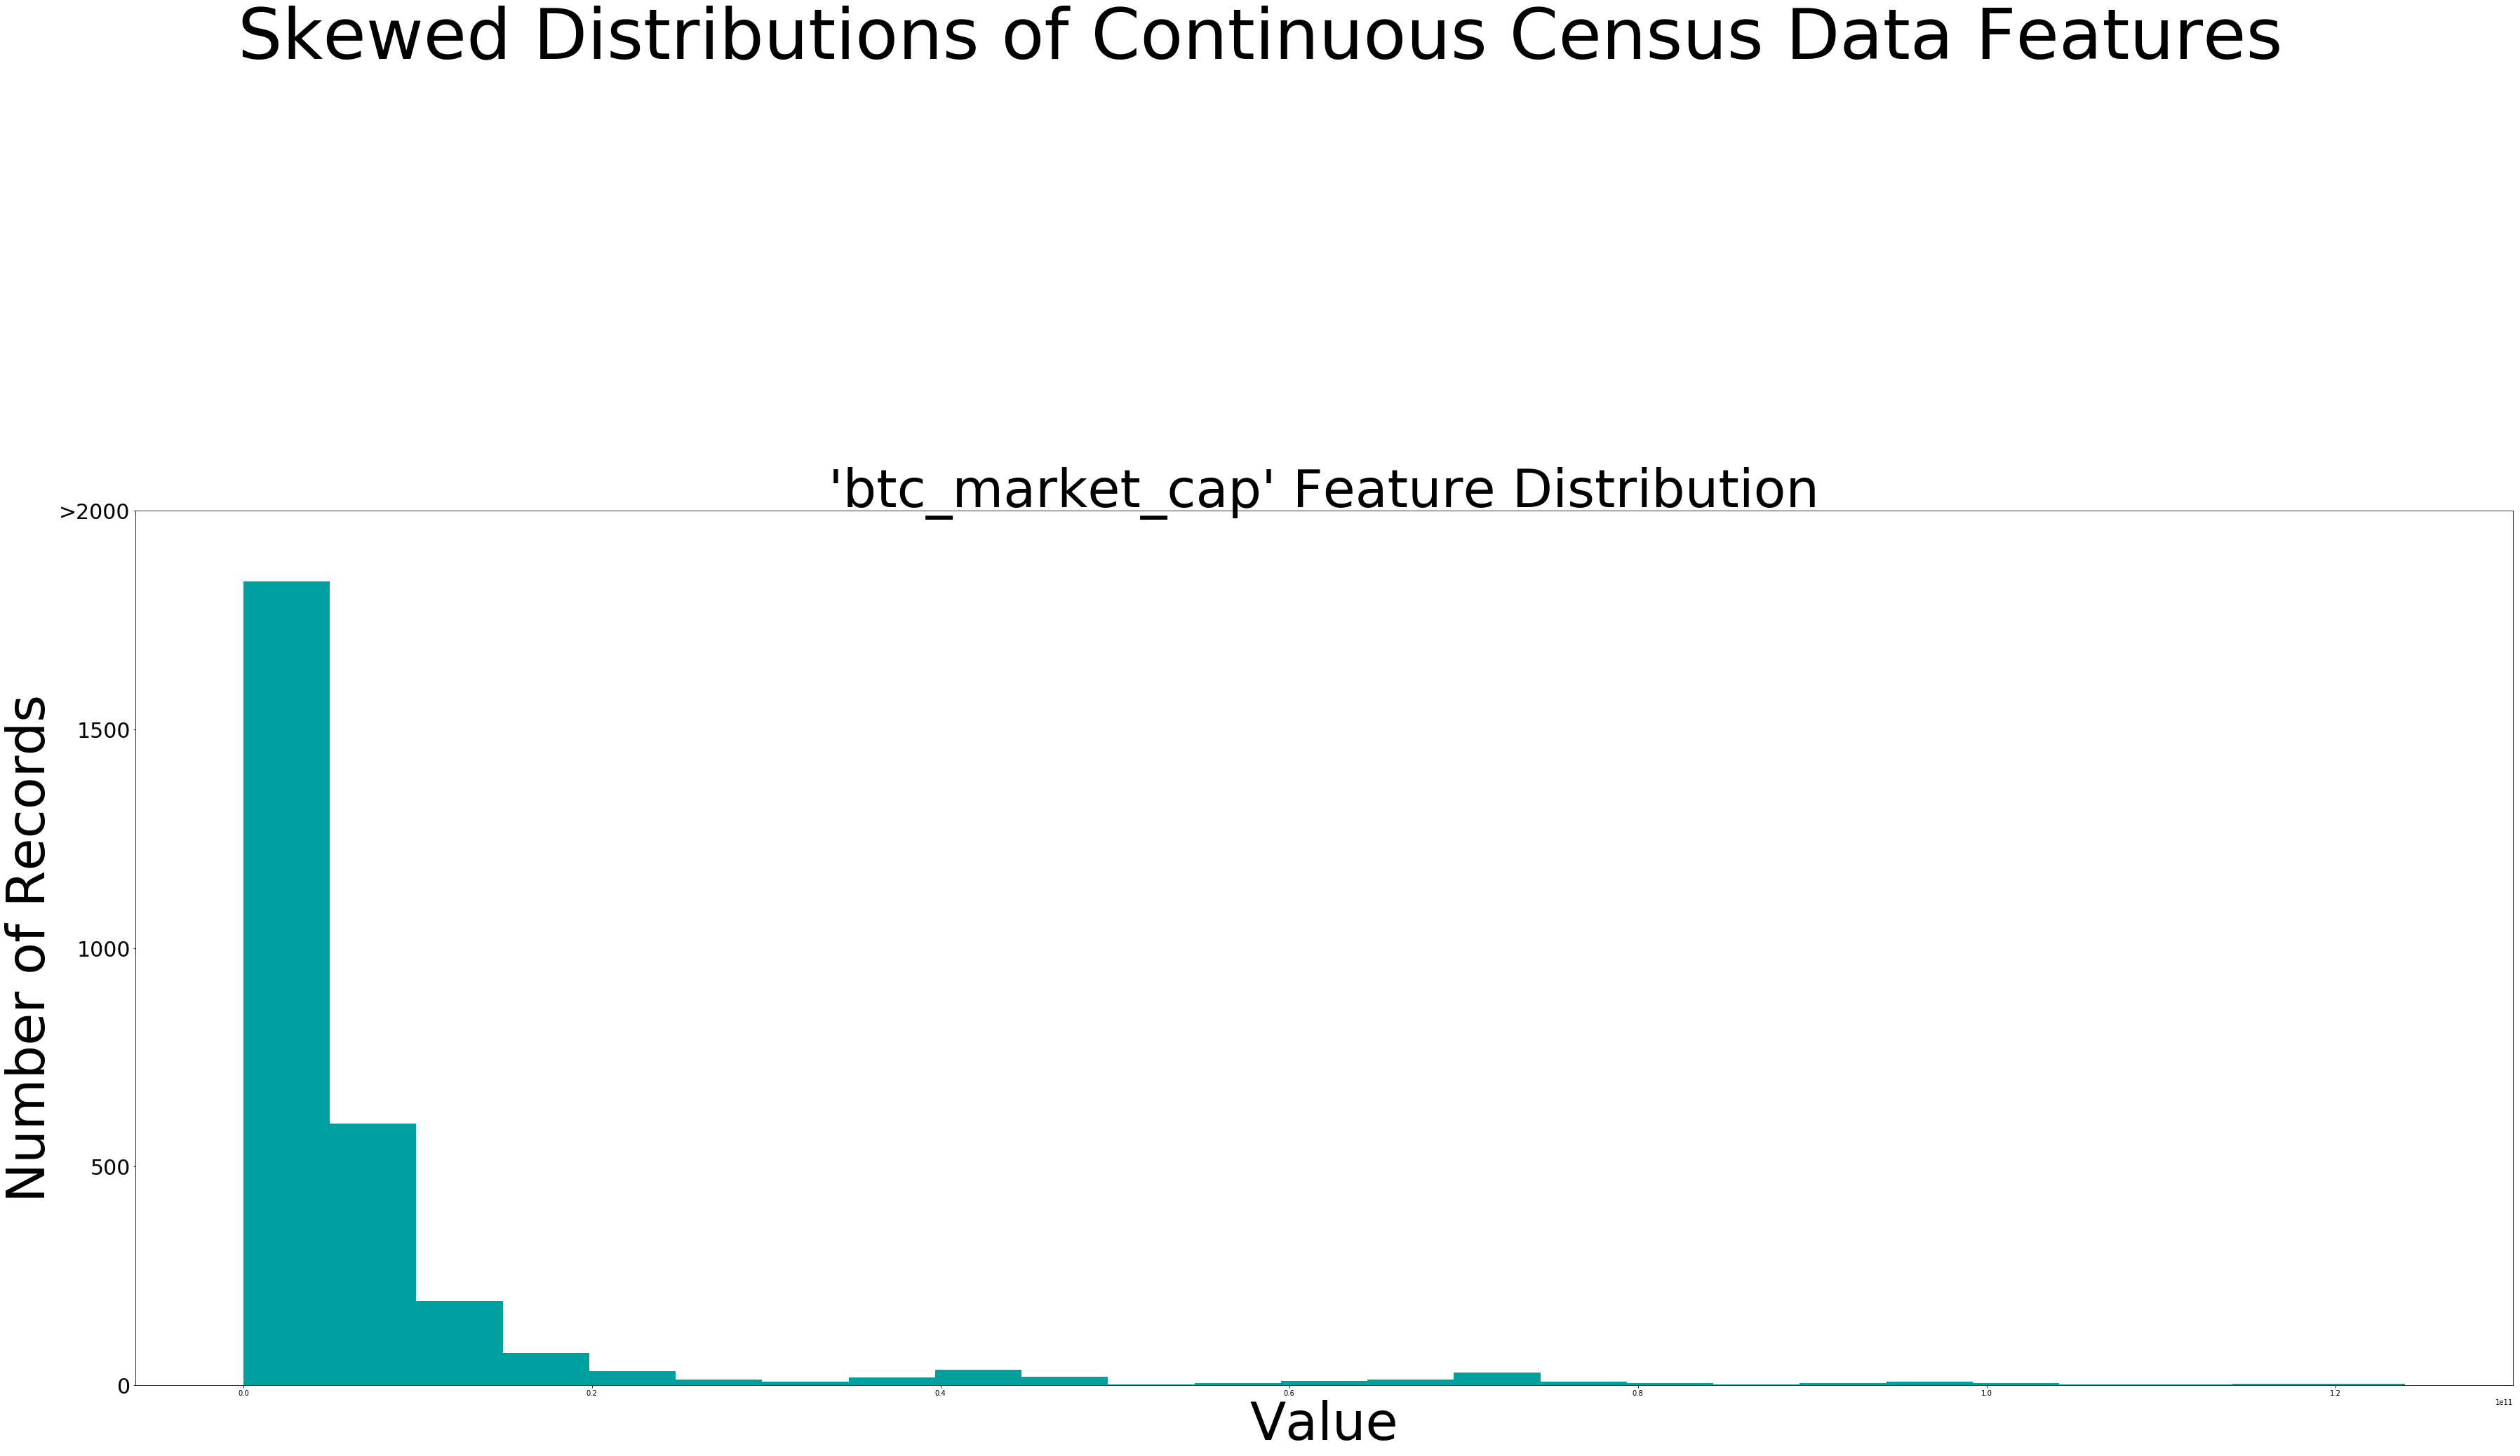

In [80]:
# Split the data into features and target label
btctrend_raw = data['btc_trend']
Input_Features_raw = data.drop(['Date','btc_market_price','btc_trend','btc_price_chg','UP','Down','NOCHG'], axis = 1)
# Visualize skewed continuous features of original data
display(np.shape(Input_Features_raw))
distribution(Input_Features_raw)
#distribution(data['btc_market_cap'])

All the features are highly skewed and it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.



(2920, 22)

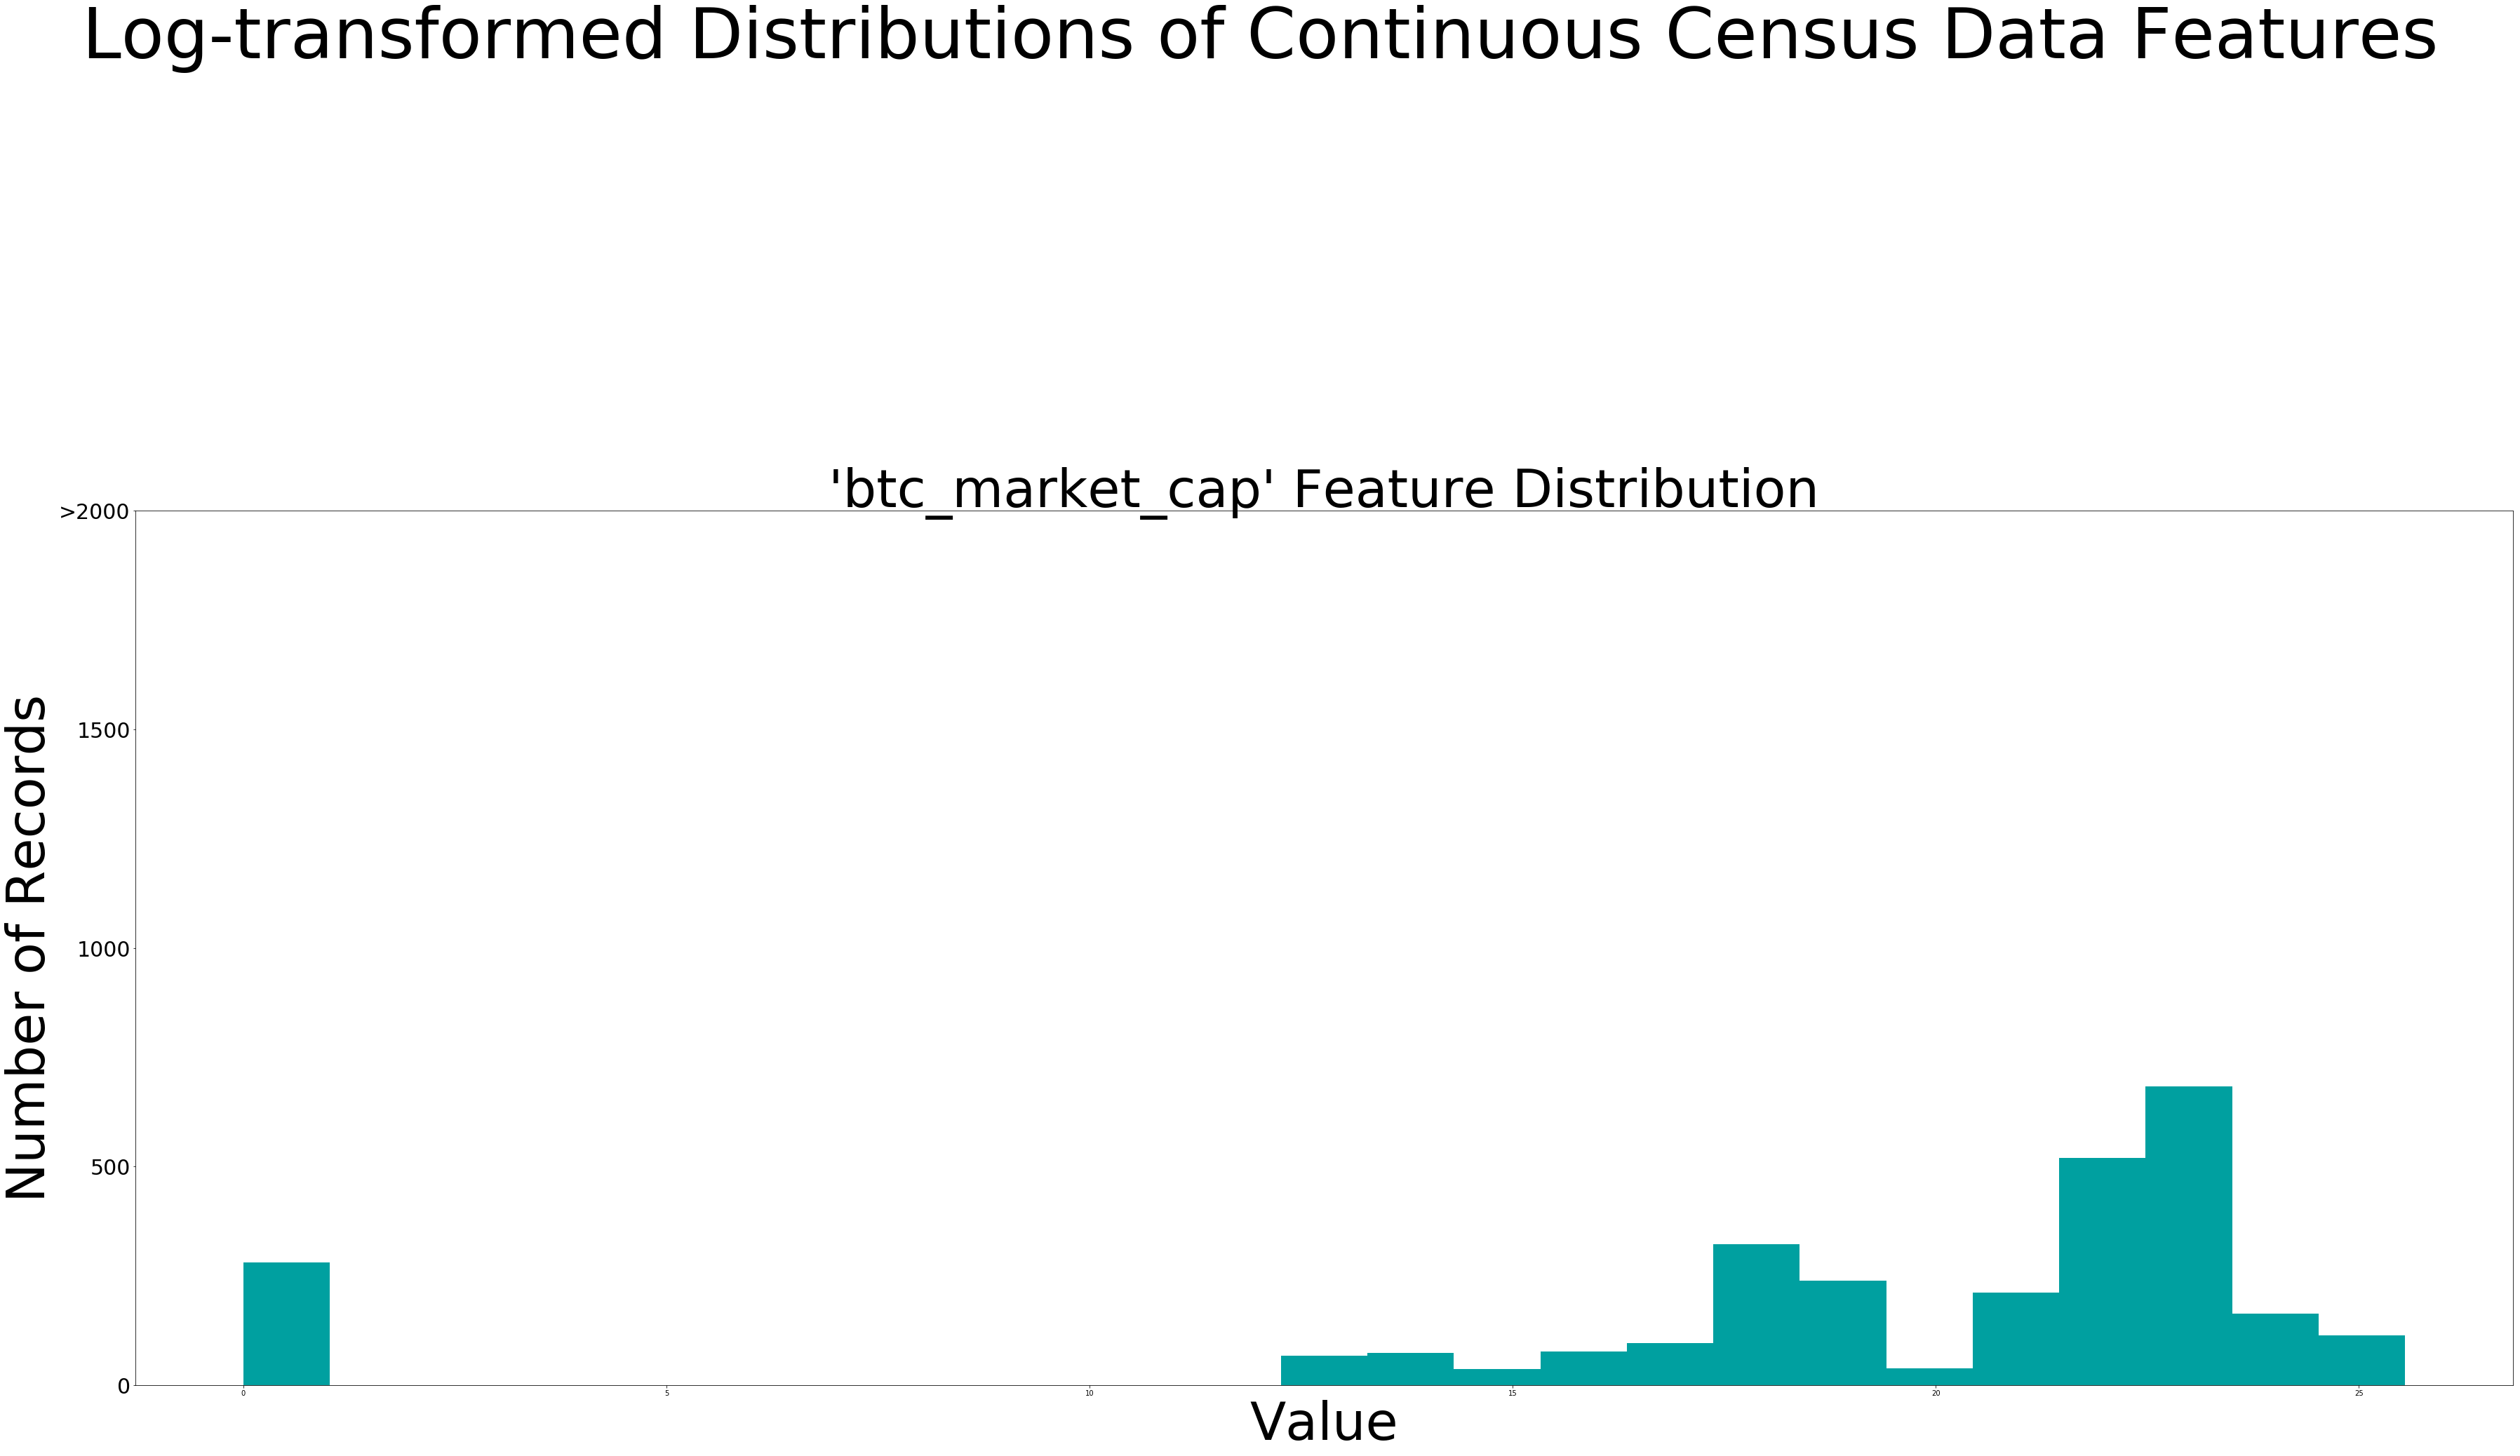

In [81]:
# Log-transform the skewed features
Skewed = (['btc_total_bitcoins','btc_market_cap','btc_trade_volume','btc_blocks_size','btc_n_transactions_per_block','btc_hash_rate','btc_difficulty','btc_miners_revenue','btc_transaction_fees','btc_cost_per_transaction','btc_n_unique_addresses','btc_n_transactions','btc_n_transactions_excluding_popular','btc_n_transactions_excluding_chains_longer_than_100','btc_output_volume','btc_estimated_transaction_volume'])
Features = pd.DataFrame(data = Input_Features_raw)
Features[Skewed] = Input_Features_raw[Skewed].apply(lambda x: np.log(x + 1))
display(np.shape(Features))
# Visualize the new log distributions
distribution(Features, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution  however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.


In [10]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['btc_total_bitcoins','btc_market_cap','btc_trade_volume','btc_blocks_size','btc_avg_block_size','btc_n_orphaned_blocks','btc_n_transactions_per_block','btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue','btc_transaction_fees','btc_cost_per_transaction_percent','btc_cost_per_transaction','btc_n_unique_addresses','btc_n_transactions','btc_n_transactions_total','btc_n_transactions_excluding_popular','btc_n_transactions_excluding_chains_longer_than_100','btc_output_volume','btc_estimated_transaction_volume','btc_estimated_transaction_volume_usd']
Features[numerical] = scaler.fit_transform(Input_Features_raw[numerical])

# Show an example of a record with scaling applied
display(Features.head(n = 5))

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0.000000,0.0,0.0,0.0,2.016424e-07,0.000000e+00,0.0,0.0,6.654257e-08,0.0,...,0.000000,0.0,0.038007,0.040940,0.000100,0.041030,0.042132,0.037677,0.000000,0.0
1,0.001020,0.0,0.0,0.0,1.030790e-04,2.894957e-07,0.0,0.0,6.043775e-08,0.0,...,0.000010,0.0,0.038007,0.051357,0.000101,0.051469,0.052852,0.370024,0.628989,0.0
2,0.002053,0.0,0.0,0.0,1.391492e-07,5.492996e-07,0.0,0.0,6.349016e-08,0.0,...,0.000000,0.0,0.036549,0.039370,0.000101,0.039456,0.040516,0.036236,0.000000,0.0
3,0.003082,0.0,0.0,0.0,2.534142e-05,8.202379e-07,0.0,0.0,6.349016e-08,0.0,...,0.000337,0.0,0.040863,0.044016,0.000101,0.044113,0.045297,0.052312,0.401584,0.0
4,0.004300,0.0,0.0,0.0,4.080844e-07,1.128291e-06,0.0,0.0,1.031715e-07,0.0,...,0.000000,0.0,0.054074,0.058247,0.000102,0.058375,0.059943,0.053543,0.000000,0.0


### Feature Relevance
We can determine relevance of each of the inpuut feature by training a supervised regression learner the data, and then order the features in terms of Feature importance, that is determined by how much each feature reduce the impurity.

Feature ranking:
1. feature 0 (0.062526)
2. feature 2 (0.059030)
3. feature 1 (0.049500)
4. feature 12 (0.047326)
5. feature 4 (0.046775)
6. feature 9 (0.046676)
7. feature 20 (0.046612)
8. feature 13 (0.046551)
9. feature 11 (0.046457)
10. feature 6 (0.046446)
11. feature 10 (0.046392)
12. feature 15 (0.046242)
13. feature 17 (0.046207)
14. feature 7 (0.045877)
15. feature 5 (0.045862)
16. feature 3 (0.045779)
17. feature 8 (0.045441)
18. feature 18 (0.045258)
19. feature 19 (0.045248)
20. feature 16 (0.045058)
21. feature 14 (0.044735)


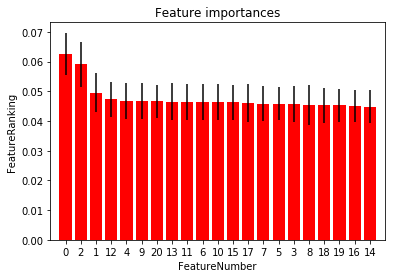

In [79]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
names = ['btc_total_bitcoins','btc_market_cap','btc_trade_volume','btc_blocks_size','btc_avg_block_size','btc_n_orphaned_blocks','btc_n_transactions_per_block','btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue','btc_transaction_fees','btc_cost_per_transaction','btc_n_unique_addresses','btc_n_transactions','btc_n_transactions_total','btc_n_transactions_excluding_popular','btc_n_transactions_excluding_chains_longer_than_100','btc_output_volume','btc_estimated_transaction_volume','btc_estimated_transaction_volume_usd']

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=2920,
                           n_features=21,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xlabel("FeatureNumber",fontsize=10)
plt.ylabel("FeatureRanking",fontsize=10)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.savefig('featureimportance.png')
plt.show()

It is observed that 80% of the impurity is reduced by 'btc_estimated_transaction_volume_usd','btc_transaction_fees','btc_trade_volume','btc_estimated_transaction_volume','btc_median_confirmation_time','btc_n_transactions_per_block','btc_n_unique_addresses','btc_avg_block_size','btc_miners_revenue','btc_output_volume','btc_n_transactions,'btc_n_transactions_excluding_chains_longer_than_100,'btc_n_transactions_total,'btc_market_cap'

Hence will be using the above features as Input.

In [94]:
   Final_Features = Features.drop(['btc_market_cap','btc_estimated_transaction_volume','btc_n_transactions_excluding_popular','btc_n_transactions'], axis = 1)
   print(Final_Features) 

      btc_total_bitcoins  btc_trade_volume  btc_blocks_size  \
0              14.107770          0.000000         0.000000   
1              14.110343          0.000000         0.000000   
2              14.112946          0.000000         0.000000   
3              14.115542          0.000000         0.000000   
4              14.118611          0.000000         0.000000   
5              14.122150          0.000000         0.000000   
6              14.125823          0.000000         0.000000   
7              14.129153          0.000000         0.000000   
8              14.132036          0.000000         0.000000   
9              14.134692          0.000000         0.000000   
10             14.137667          0.000000         0.000000   
11             14.140453          0.000000         0.000000   
12             14.144059          0.000000         0.000000   
13             14.147509          0.000000         0.000000   
14             14.151162          0.000000         0.00

### Split Data
    Now as we have finalized the features, we will now split the data into training and test sets.Dataset will be split in to 3 sets with incremental date range such that in the kth split, it returns first k folds as train set and k+1 fold as test set.


In [95]:
# Import train_test_split
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3)
X = Final_Features.values
Y = btctrend_raw.values
i=0
for train_index, test_index in tss.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 730 samples.
Testing set has 730 samples.
Training set has 1460 samples.
Testing set has 730 samples.
Training set has 2190 samples.
Testing set has 730 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. We will compare Random Forest, SVM and Logistic Regression against naive predictor

### Metrics and the Naive Predictor

With Bitcoin predictions it is very important to Accurately predict price trends. Hence using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, Identifying price rise when price actually drops is detrimental as the investors will loose money. Therefore, a model's ability to precisely predict price rise is *more important* than the model's ability to **recall** . We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (price rise(42%), drop(47%) and no change(11%)) there are very few records for 'No change' and a higher percentage of records with price drop, This can greatly affect **accuracy**, since we could simply guess the prices will go down all the time.Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. We will use a naive algorithm that would always predict price go down as Naive.



In [96]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

TP= n_Price_Down
FP= btctrend_raw.count()- TP
Total=btctrend_raw.count()
TN = 0
FN = 0
beta = 0.5
# TODO: Calculate accuracy, precision and recall
accuracy = TP/Total
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+beta*beta)*((precision*recall)/((beta*beta*precision)+recall))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}, recall: {:.4f}, precision: {:.4f}]".format(accuracy, fscore, recall, precision))

Naive Predictor: [Accuracy score: 0.4253, F-score: 0.4806, recall: 1.0000, precision: 0.4253]


###  Supervised Learning Models

We will use 

- Random Forest
- Support Vector Machines (SVM)

algorithms to train the model.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model , it's important that we create a training and predicting pipeline that allows us to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 

In [97]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
# Import train_test_split

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from time import time

def train_predict(learner,sample_size,X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
       
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
    
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    print("Accuracy score: {}".format(results['acc_test']))
        
    # TODO: Compute Precision on the test set
    results['precn_test'] = precision_score(y_test, predictions_test,average='weighted')
    
    print("Precision score: {}".format(results['precn_test'] ))
    
    
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5,average='weighted')
    
    print("FScore:{}".format(results['f_test']))
    
    print("prediction time:{}".format(results['pred_time']))
    

       
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the below code cell, we will
- Import the two supervised learning models we discussed in the previous section.
- Initialize the two models and store them in `'clf_A'`and `'clf_B'`
- Test the 2 models on varying time series data.



In [98]:
# TODO: Import the three supervised learning models from sklearn
# Import train_test_split


# TODO: Initialize the three models
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

clf_A = RandomForestClassifier(random_state=1)
clf_B = SVC(random_state = 1)


# Collect results on the learners
tss = TimeSeriesSplit(n_splits=3)
X = Final_Features.values
Y = btctrend_raw.values
for train_index, test_index in tss.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    for clf in [clf_A, clf_B]:
        train_predict(clf, X_train.shape[0],X_train,y_train, X_test, y_test)
                


Training set has 730 samples.
Testing set has 730 samples.
RandomForestClassifier trained on 730 samples.
Accuracy score: 0.5643835616438356
Precision score: 0.5466869011510364
FScore:0.5460981545551682
prediction time:0.0
SVC trained on 730 samples.
Accuracy score: 0.02054794520547945
Precision score: 0.000422218052167386
FScore:0.0005250752607873794
prediction time:0.06397843360900879
Training set has 1460 samples.
Testing set has 730 samples.


C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier trained on 1460 samples.
Accuracy score: 0.4794520547945205
Precision score: 0.4764001091000149
FScore:0.4767311418993851
prediction time:0.002340078353881836


C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 1460 samples.
Accuracy score: 0.5054794520547945
Precision score: 0.2555094764496153
FScore:0.2835541468656418
prediction time:0.1466977596282959
Training set has 2190 samples.
Testing set has 730 samples.
RandomForestClassifier trained on 2190 samples.
Accuracy score: 0.4
Precision score: 0.16
FScore:0.1818181818181818
prediction time:0.0


C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 2190 samples.
Accuracy score: 0.4
Precision score: 0.16
FScore:0.1818181818181818
prediction time:0.15848040580749512


----
## Improving Results
In this section we will perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Implementation: Model Tuning
I used grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. I used the entire training set for this. 

In [99]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.metrics         import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
import statistics
# TODO: Initialize the classifier
clf_A = RandomForestClassifier(random_state=1)
clf_B = RandomForestClassifier(random_state=20)
clf_C = RandomForestClassifier(random_state=100)
clf_D = RandomForestClassifier(random_state=500)




accuracy=[]
precision=[]
fbeta=[]

#learner = clf_A.fit(X_train, y_train)
#predictions_test = learner.predict(X_test)
#accuracy.append(accuracy_score(y_test, predictions_test))
#print("Accuracy score on the testing data: {:.4f}",*accuracy)
#MeanAccuracy=statistics.mean(accuracy)
#print("Mean Accuracy: ",MeanAccuracy)
#precision[i]=precision_score(y_test, predictions_test, average='weighted')
#fbeta[i]=fbeta_score(y_test, predictions_test, beta = 0.5,average='weighted')

for clf in [clf_A,clf_B,clf_C,clf_D]:
    i=i+1
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
    parameters = {'n_estimators': [100, 200, 300],   # , 'sag'
                  'max_features': ["auto", "sqrt"],
                  'max_depth': (150, 155, 160), 
                  'min_samples_leaf': [1,5,10,50,100,200,500]}


# TODO: Make an fbeta_score scoring object using make_scorer()
    scorer = make_scorer( precision_score, average='weighted')
    my_cv = TimeSeriesSplit(n_splits=3).split(X)
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=my_cv)
    

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, Y)

# Get the estimator
    best_clf = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, best_predictions))
    precision.append(precision_score(y_test, best_predictions, average='weighted'))
    fbeta.append(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted'))
    print("\nOptimal hyper parameters are\n")
    print (grid_obj.best_params_)
    print("\nOptimized Model\n------")
    print("Accuracy score on the testing data:",*accuracy)
    print("Precision on testing data: ",*precision)
    print("F-score on the testing data: ",*fbeta)
print("Mean Accuracy: ",statistics.mean(accuracy))
print("Mean Precision: ",statistics.mean(precision))
print("Mean FBeta:",statistics.mean(fbeta))
#print("Variance in Accuracy: {:.4f}".format(accuracy.var()))
#print("Variance in Precision: {:.4f}".format(precision.var()))
#print("Variance in FBeta: {:.4f}".format(fbeta.var()))

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla


Optimal hyper parameters are

{'max_depth': 150, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 300}

Optimized Model
------
Accuracy score on the testing data: 0.915068493150685
Precision on testing data:  0.9205524087766362
F-score on the testing data:  0.9161393024101468


C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla


Optimal hyper parameters are

{'max_depth': 150, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 300}

Optimized Model
------
Accuracy score on the testing data: 0.915068493150685 1.0
Precision on testing data:  0.9205524087766362 1.0
F-score on the testing data:  0.9161393024101468 1.0


C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla


Optimal hyper parameters are

{'max_depth': 150, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}

Optimized Model
------
Accuracy score on the testing data: 0.915068493150685 1.0 1.0
Precision on testing data:  0.9205524087766362 1.0 1.0
F-score on the testing data:  0.9161393024101468 1.0 1.0


C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\cla


Optimal hyper parameters are

{'max_depth': 150, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 100}

Optimized Model
------
Accuracy score on the testing data: 0.915068493150685 1.0 1.0 0.9178082191780822
Precision on testing data:  0.9205524087766362 1.0 1.0 0.9210619597977248
F-score on the testing data:  0.9161393024101468 1.0 1.0 0.9180870687426748
Mean Accuracy:  0.9582191780821918
Mean Precision:  0.9604035921435903
Mean FBeta: 0.9585565927882054


C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
